In [9]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
lfw = fetch_lfw_people(min_faces_per_person=20, resize=0.5)
people = lfw.target_names[:2]
print("Selected People:", people)

mask = np.isin(lfw.target, [0,1])
X = lfw.images[mask]
y = lfw.target[mask]
y = np.where(y == 0, 0, 1)

print("Number of images:", X.shape[0])

Selected People: ['Alejandro Toledo' 'Alvaro Uribe']
Number of images: 74


In [11]:
IMG_SIZE = 100
X_processed = np.array([cv2.resize(img, (IMG_SIZE, IMG_SIZE)) for img in X])
X_processed = X_processed.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
X_processed = X_processed / 255.0

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42
)

In [13]:
datagen = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)
datagen.fit(X_train)

In [15]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE,1)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 98, 98, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     1,638,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,731,329 (6.60 MB)

 Trainable params: 1,731,329 (6.60 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    validation_data=(X_test, y_test),
                    epochs=20)

Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 629ms/step - accuracy: 0.5369 - loss: 0.6934 - val_accuracy: 0.5333 - val_loss: 0.6922
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 531ms/step - accuracy: 0.4984 - loss: 0.6943 - val_accuracy: 0.5333 - val_loss: 0.6924
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 354ms/step - accuracy: 0.5231 - loss: 0.6925 - val_accuracy: 0.5333 - val_loss: 0.6916
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 365ms/step - accuracy: 0.4984 - loss: 0.6950 - val_accuracy: 0.5333 - val_loss: 0.6917
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 375ms/step - accuracy: 0.4871 - loss: 0.6945 - val_accuracy: 0.5333 - val_loss: 0.6918
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 377ms/step - accuracy: 0.5221 - loss: 0.6920 - val_accuracy: 0.5333 - val_loss: 0.6918
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 369ms/step - accuracy: 0.5242 - loss: 0.6921 - val_accuracy: 0.5333 - val_loss: 0.6915
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 305ms/step - accuracy: 0.5169 - loss: 0.6913 - val_accuracy: 0.5333 - val_loss: 0.6912
Epo

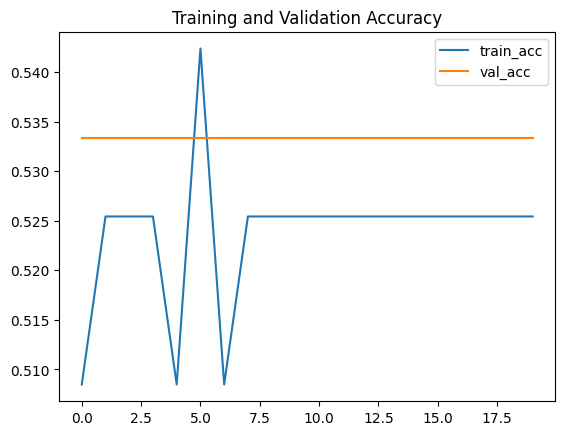

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.5333 - loss: 0.6918
Test Accuracy: 53.33%


In [17]:
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title("Training and Validation Accuracy")
plt.legend()
plt.show()

loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc*100:.2f}%")

In [18]:
def predict_image(img):
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img = img.reshape(1, IMG_SIZE, IMG_SIZE, 1) / 255.0
    pred = model.predict(img)
    label = people[int(pred[0][0] > 0.5)]
    print(f"Predicted: {label}")
    return label
predict_image(X_test[0].reshape(IMG_SIZE, IMG_SIZE))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Predicted: Alejandro Toledo


np.str_('Alejandro Toledo')